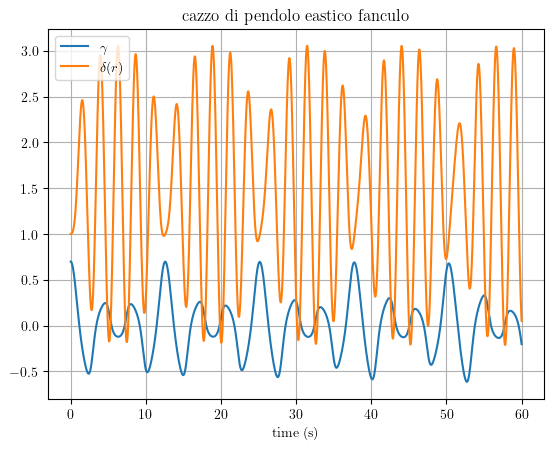

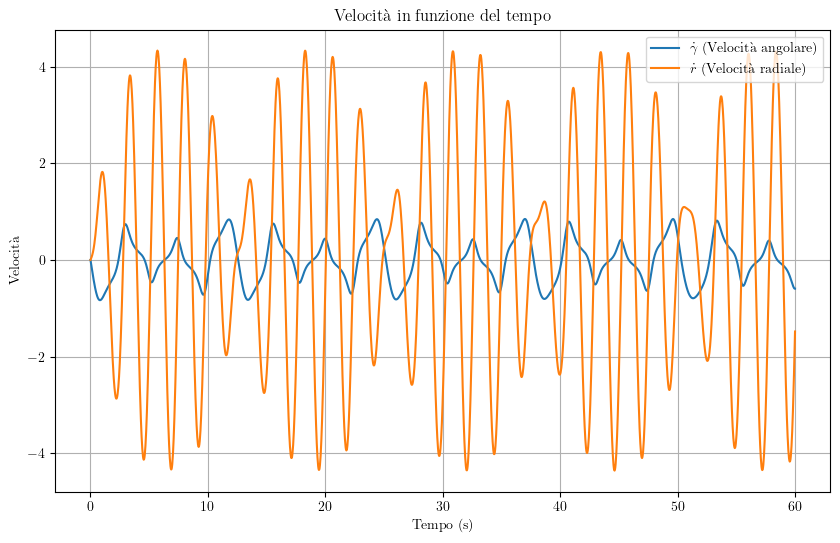

In [1]:
"""Riccardo Venturi Ca Pendolo Elastico, chiuso da migliorare"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
###Simulation###SPRing this ass with my pendulum, cha chass
#costanti da variare per variare simulazione
g, k, m, r_0=9.892, 14, 2, 3 #gravità, costante molla, mass, lunghezza iniziale
###initial_conditions
#crea vettore starter, essendo una EDo, 
#deg2rad = dai angolo in gradi dell'escursione del pendolo iniziale
#secondo dato è velocità angolare iniziale
#terzo allungamento molla iniziale
#quarto velocità della deformazione
angolo = 40
x0= np.array([np.deg2rad(40), 0, 1, 0])

#sistema edo matriciale
def massa_molla(t,y):
    #posizione nella matrice della matrice starter
    #fai matrice derivate = matrice coeff, * matrice starter
    gamma=y[0]
    gamma_d=y[1]
    r=y[2]
    r_d=y[3]
    
    return (
        gamma_d,
        (-2.0*r_d*gamma_d - g*np.sin(gamma))/(r + r_0),
        r_d,
        -r*k/m + r*gamma_d**2 + r_0*gamma_d**2 + g*np.cos(gamma),
    )

#solve Edo, evaluate at 30 fps
# t 0, 10 intervallo, x0 inserisce y nella funzione
sol = solve_ivp(massa_molla, [0, 60], x0,
                t_eval=np.linspace(0,60,20*100))
#output solver
gamma=sol.y[0]
r=sol.y[2]
t=sol.t
#plot gamma, r sul tempo t
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(t, gamma, label='$\\gamma$')
plt.plot(t, r, label='$\\delta(r)$')
plt.legend()
plt.grid()
plt.xlabel("time (s)")
plt.title('cazzo di pendolo eastico fanculo')
plt.show()

gamma_d = sol.y[1]  # Velocità angolare
r_d = sol.y[3]      # Velocità radiale

# Plot delle velocità
plt.figure(figsize=(10, 6))  # Puoi scegliere la dimensione del grafico che preferisci
plt.plot(t, gamma_d, label=r'$\dot{\gamma}$ (Velocità angolare)')
plt.plot(t, r_d, label=r'$\dot{r}$ (Velocità radiale)')

# Aggiungi legenda, griglia e etichette
plt.legend()
plt.grid()
plt.xlabel("Tempo (s)")
plt.ylabel("Velocità")
plt.title("Velocità in funzione del tempo")
plt.show()


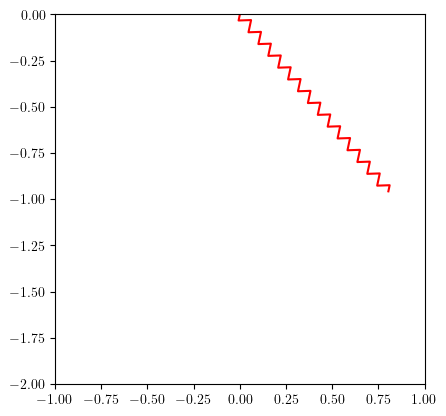

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
from matplotlib.transforms import Affine2D

fig=plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_ylim(-2,0)#seggna per problemi limiti grafico
ax.set_xlim(-1,1)#idem
def Crea_molla(n):
    data=np.zeros((2,2+n))
    data[:,-1]=[0,-1]
    for i in range(1,n+1):
        data[0,i] = -1/(2*n) if i % 2 else 1/(2*n)
        data[1,i] = -(2*i-1)/(2*n)
    return data
gamma = np.deg2rad(40)
r=0.25
r_0 = 1
spring_lenght = r + r_0
#mass position
px = spring_lenght + np.sin(gamma)
py = -spring_lenght + np.cos(gamma)
circle=ax.add_patch(plt.Circle((px,py), 0.1,fc='b',zorder=3))
#molla
A=Affine2D().scale(2/spring_lenght, spring_lenght).rotate(gamma).get_matrix()
#note append [1111111 ] to data to allow matrix moltiplication/ affine transform
data=r_0*np.append(Crea_molla(30),np.ones((1,30+2)), axis=0)
data_new = A @ data
spring=Line2D(data_new[0,:], data_new[1,:], color='r')
ax.add_line(spring)
#problemi vista della massa°|°## migliorare
plt.savefig('elastic_pendulum.png')


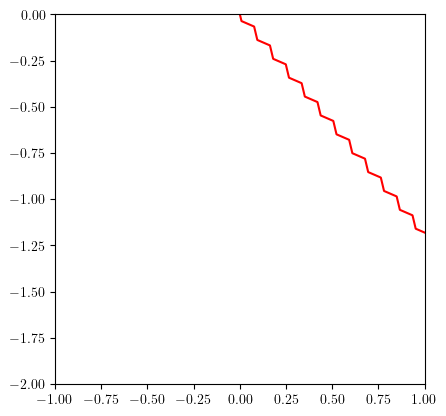

In [3]:
import matplotlib.animation as animation
#animazione
gamma=sol.y[0]
r=sol.y[2]
t=sol.t
fig=plt.figure()
ax=fig.add_subplot(aspect='equal')
ax.set_xlim(-1,1)
ax.set_ylim(-2,0)
r_0=1

data=r_0*np.append(Crea_molla(30), np.ones((1,30+2)), axis=0)
data = r_0 * data #opzionale
spring=Line2D(data[0,:],data[1,:], color='r')
circle=ax.add_patch(plt.Circle((0,0), 0.1, fc='b', zorder=3))
ax.add_line(spring)
#animate each frame i
def anima(i):
    #mass spring
    spring_lenght=(r_0+r[i])
    px = spring_lenght* np.sin(gamma[i])
    py = -spring_lenght*np.cos(gamma[i])
    circle.set_center((px,py))
    #spring
    A=Affine2D().scale(2/spring_lenght, spring_lenght).rotate(gamma[i]).get_matrix()
    data_new=A @ data
    spring.set_data(data_new[0,:],data_new[1,:])
    
#save a video 30 fpsss
ani = animation.FuncAnimation(fig, anima,frames=len(t))
ffmpeg_writer=animation.FFMpegWriter(fps=30)
ani.save('pendolo_elastico.gif', writer=ffmpeg_writer)


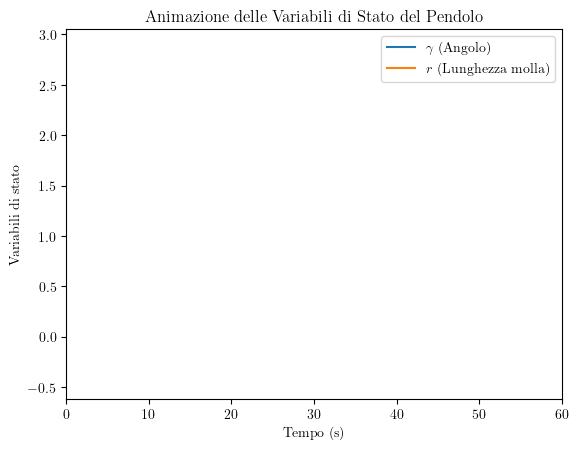

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp
from IPython.display import HTML

# Costanti per la simulazione
g, k, m, r_0 = 9.892, 14, 2, 3

# Condizioni iniziali
x0 = np.array([np.deg2rad(40), 0, 1, 0])

# Definizione del sistema di equazioni differenziali
def massa_molla(t, y):
    gamma, gamma_d, r, r_d = y
    return [
        gamma_d,
        (-2.0 * r_d * gamma_d - g * np.sin(gamma)) / (r + r_0),
        r_d,
        -r * k / m + r * gamma_d**2 + r_0 * gamma_d**2 + g * np.cos(gamma),
    ]

# Risoluzione del sistema di equazioni differenziali
sol = solve_ivp(massa_molla, [0, 60], x0, t_eval=np.linspace(0, 60, 600))

# Estrazione dei dati dalla soluzione
gamma = sol.y[0]
r = sol.y[2]
t = sol.t

# Preparazione del grafico per l'animazione
fig, ax = plt.subplots()
line_gamma, = ax.plot([], [], label=r'$\gamma$ (Angolo)')
line_r, = ax.plot([], [], label=r'$r$ (Lunghezza molla)')
ax.set_xlim(0, np.max(t))
ax.set_ylim(min(np.min(gamma), np.min(r)), max(np.max(gamma), np.max(r)))
ax.legend()
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Variabili di stato')
ax.set_title('Animazione delle Variabili di Stato del Pendolo')

# Funzione di inizializzazione per l'animazione
def init():
    line_gamma.set_data([], [])
    line_r.set_data([], [])
    return line_gamma, line_r

# Funzione di aggiornamento per l'animazione
def update(frame):
    line_gamma.set_data(t[:frame], gamma[:frame])
    line_r.set_data(t[:frame], r[:frame])
    return line_gamma, line_r

# Creazione dell'animazione
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=False)

# Visualizzazione dell'animazione nel notebook
HTML(ani.to_html5_video())
